<h2>Importing libraries required for Wine Quality Prediction.</h2>

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

<h2>Reading input data</h2>

In [17]:
wine = pd.read_csv('winequality-white.csv')

In [18]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<h2>Describing the data</h2>

In [19]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<h2>Taking info from data</h2>

In [20]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<h2>Plotting out the data</h2>

In [22]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
fig = plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

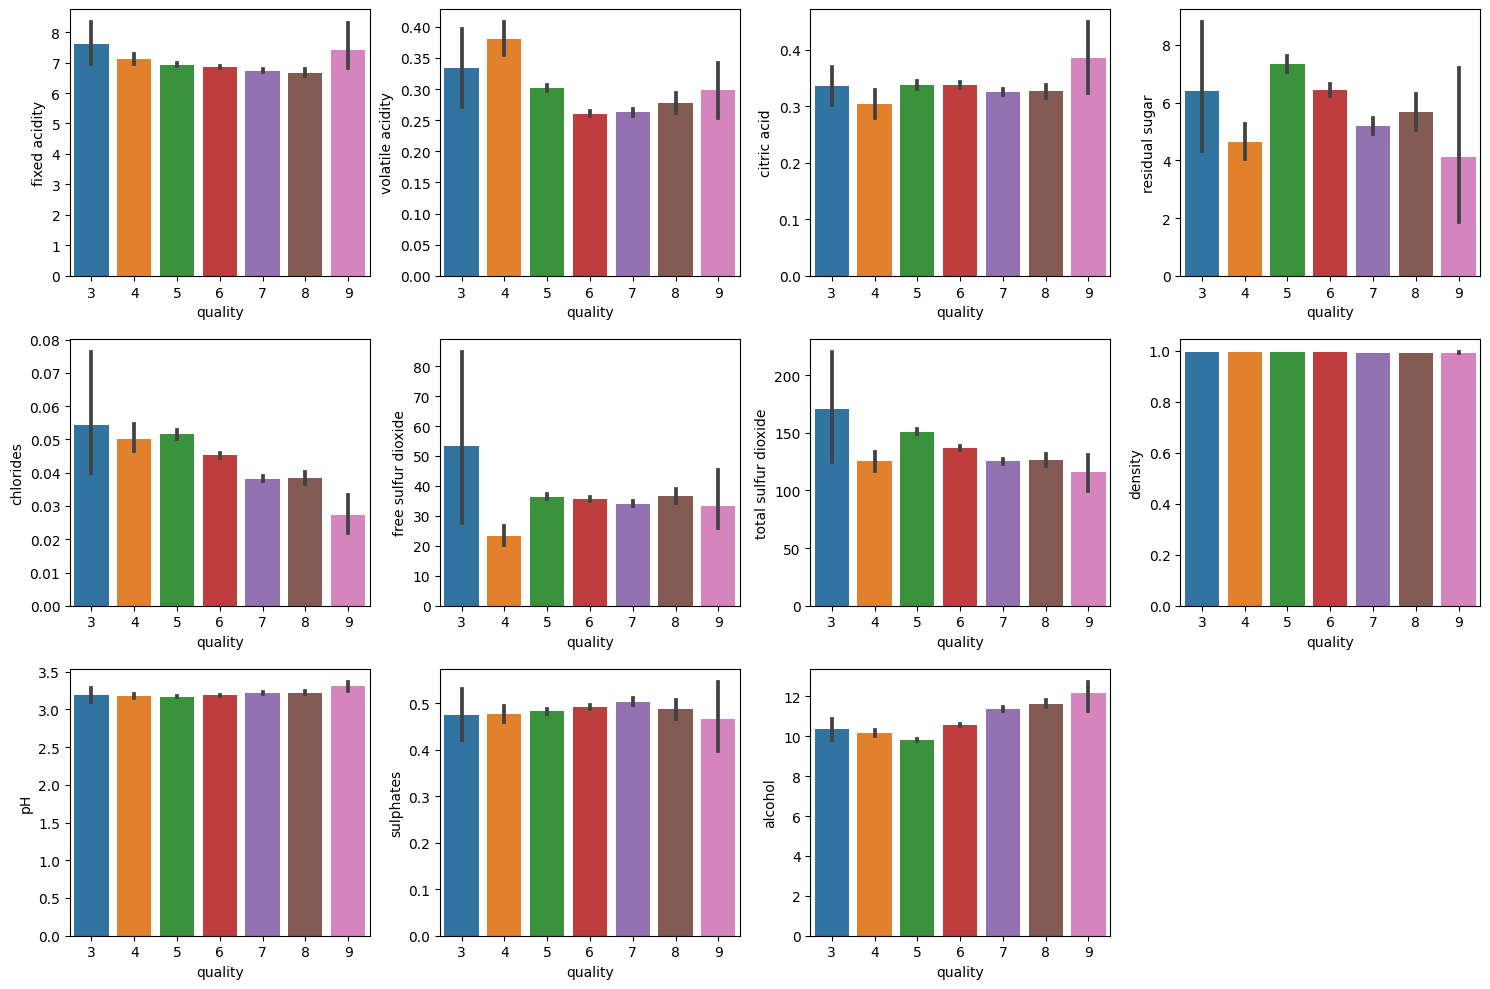

In [25]:
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=wine)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=wine)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=wine)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=wine)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=wine)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=wine)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=wine)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=wine)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=wine)

plt.tight_layout()

<h2>Count the no. of instances of each class
</h2>

In [26]:
wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

<h2>Making just 2 categories good and bad.</h2>

In [27]:
ranges = (2,6.5,8) 
groups = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=ranges,labels=groups)

<h2>Alloting 0 to bad and 1 to good</h2>

In [28]:
le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


<h2>Checking count again</h2>

In [29]:
wine['quality'].value_counts()

quality
0    3838
1    1055
2       5
Name: count, dtype: int64

<h2>Balancing the two classes</h2>

In [30]:
good_quality = wine[wine['quality']==1]
bad_quality = wine[wine['quality']==0]

bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:217]

new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2288,7.4,0.33,0.26,15.60,0.049,67.0,210.0,0.99907,3.06,0.68,9.5,0
4434,7.2,0.24,0.24,1.70,0.045,18.0,161.0,0.99196,3.25,0.53,11.2,0
2993,6.8,0.18,0.28,9.80,0.039,29.0,113.0,0.99406,3.11,0.45,10.9,1
4786,4.4,0.32,0.39,4.30,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,1
2144,8.2,0.21,0.32,10.65,0.053,53.0,145.0,0.99720,3.17,0.48,10.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68,6.7,0.23,0.31,2.10,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,1
3224,5.7,0.15,0.28,3.70,0.045,57.0,151.0,0.99130,3.22,0.27,11.2,0
4564,7.0,0.23,0.35,1.40,0.036,31.0,113.0,0.99120,3.16,0.48,10.8,1
1555,6.9,0.24,0.49,1.30,0.032,35.0,148.0,0.99320,3.45,0.57,10.7,1


<h2>Again checking the counts of classes in the new dataframe
</h2>

In [31]:
new_df['quality'].value_counts()

quality
1    1055
0     217
Name: count, dtype: int64

<h2>Checking the correlation between columns</h2>

In [31]:
correlation_matrix=new_df.corr()['quality'].sort_values(ascending=False)
correlation_matrix

quality                 1.000000
alcohol                 0.328494
pH                      0.066916
sulphates               0.043313
free sulfur dioxide    -0.018553
volatile acidity       -0.049940
citric acid            -0.056804
fixed acidity          -0.071752
residual sugar         -0.111896
total sulfur dioxide   -0.183954
chlorides              -0.249075
density                -0.259892
Name: quality, dtype: float64

<h2>Splitting the data into train and test</h2>

In [32]:
from sklearn.model_selection import train_test_split

X = new_df.drop('quality',axis=1) 
y = new_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<h2>Training our Wine Quality Prediction model</h2>

In [34]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(X_train, y_train)

print('Best parameters --> ', grid_rf.best_params_)

# Wine Quality Prediction
pred = grid_rf.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

Best parameters -->  {'n_estimators': 900}
[[ 26  46]
 [  4 306]]


              precision    recall  f1-score   support

           0       0.87      0.36      0.51        72
           1       0.87      0.99      0.92       310

    accuracy                           0.87       382
   macro avg       0.87      0.67      0.72       382
weighted avg       0.87      0.87      0.85       382



0.8691099476439791


<h2>Plotting Feature Importance</h2>

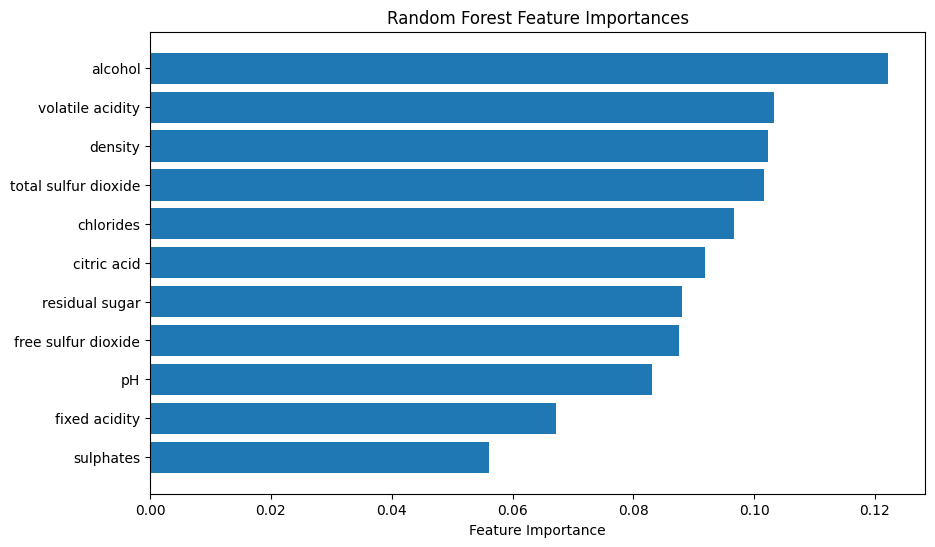

In [61]:
importance = grid_rf.best_estimator_.feature_importances_
feature_names = X.columns
sorted_idx = importance.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

<h2>Plotting the Confusion Matrix
</h2>

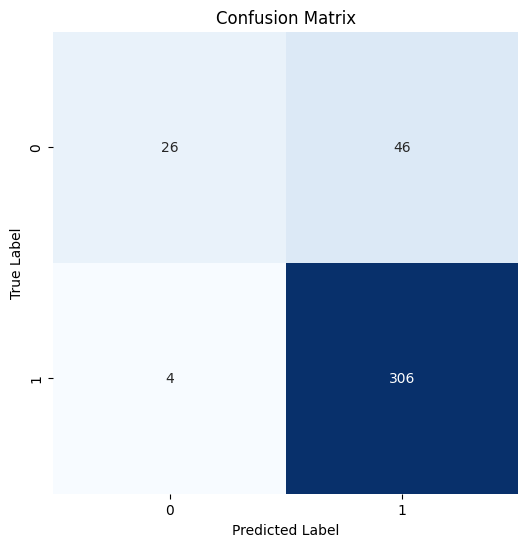

In [63]:
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<h2>Plotting the correlation matrix</h2>

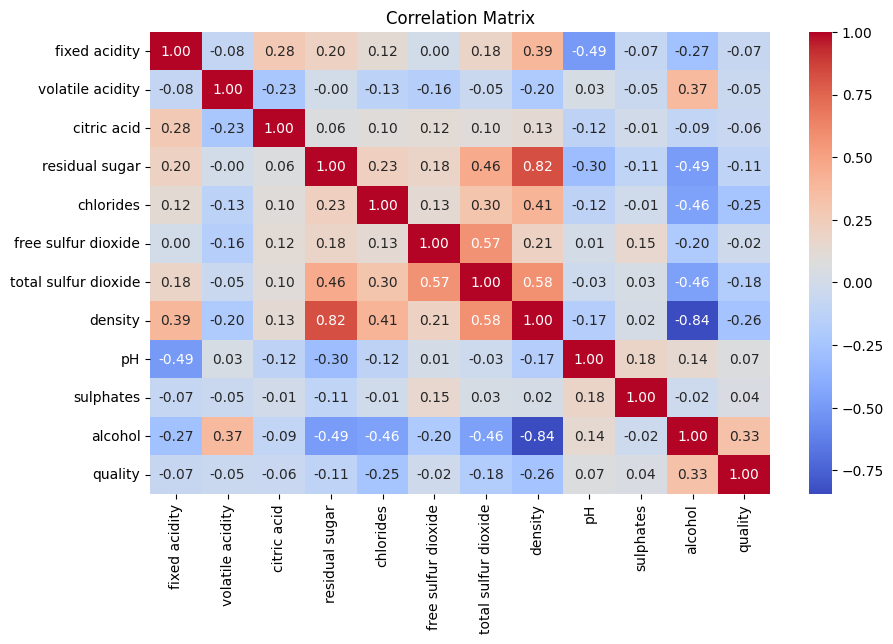

In [64]:

plt.figure(figsize=(10, 6))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<h2>Plotting the distribution of the 'quality' class in the balanced dataset</h2>

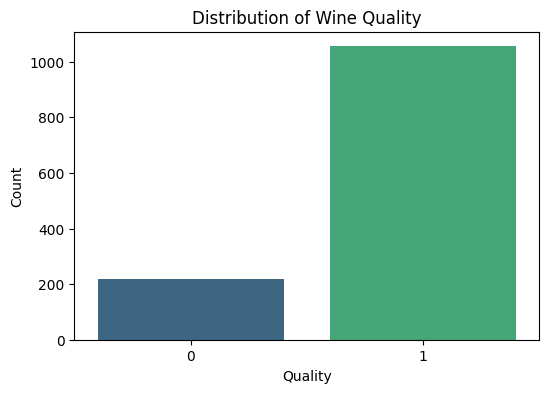

In [65]:
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=new_df, palette='viridis')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

In [45]:
# Define distinct color palette for bad (0) and good (1) quality
palette_colors = {0: 'red', 1: 'blue'}

<h2>Scatter plots</h2>

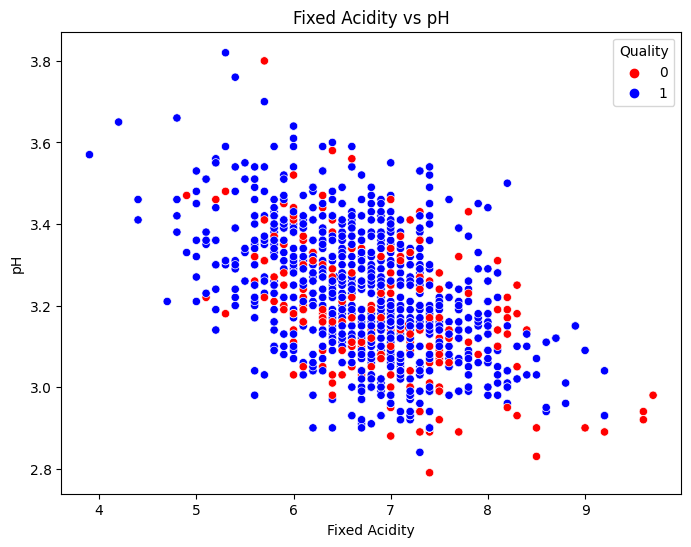

In [55]:
# Scatter plot: Fixed Acidity vs pH
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fixed acidity', y='pH', data=new_df, hue='quality', palette=palette_colors)
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Fixed Acidity vs pH')
plt.legend(title='Quality', loc='upper right')
plt.show()

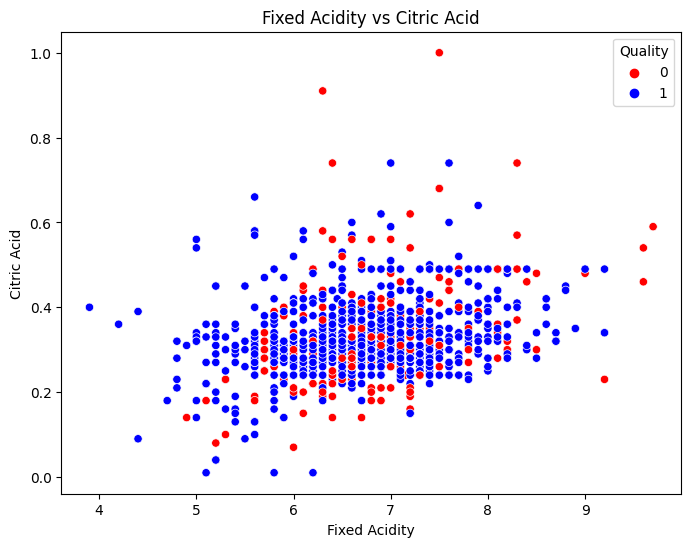

In [54]:
# Scatter plot: Fixed Acidity vs Citric Acid
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fixed acidity', y='citric acid', data=new_df, hue='quality', palette=palette_colors)
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.title('Fixed Acidity vs Citric Acid')
plt.legend(title='Quality', loc='upper right')
plt.show()

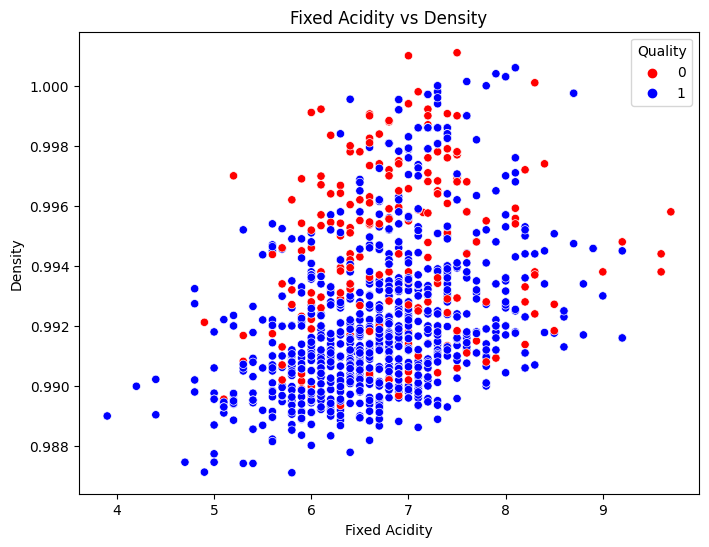

In [53]:
# Scatter plot: Fixed Acidity vs Density
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fixed acidity', y='density', data=new_df, hue='quality', palette=palette_colors)
plt.xlabel('Fixed Acidity')
plt.ylabel('Density')
plt.title('Fixed Acidity vs Density')

plt.legend(title='Quality', loc='upper right')
plt.show()

<h2>KDE Plots</h2>

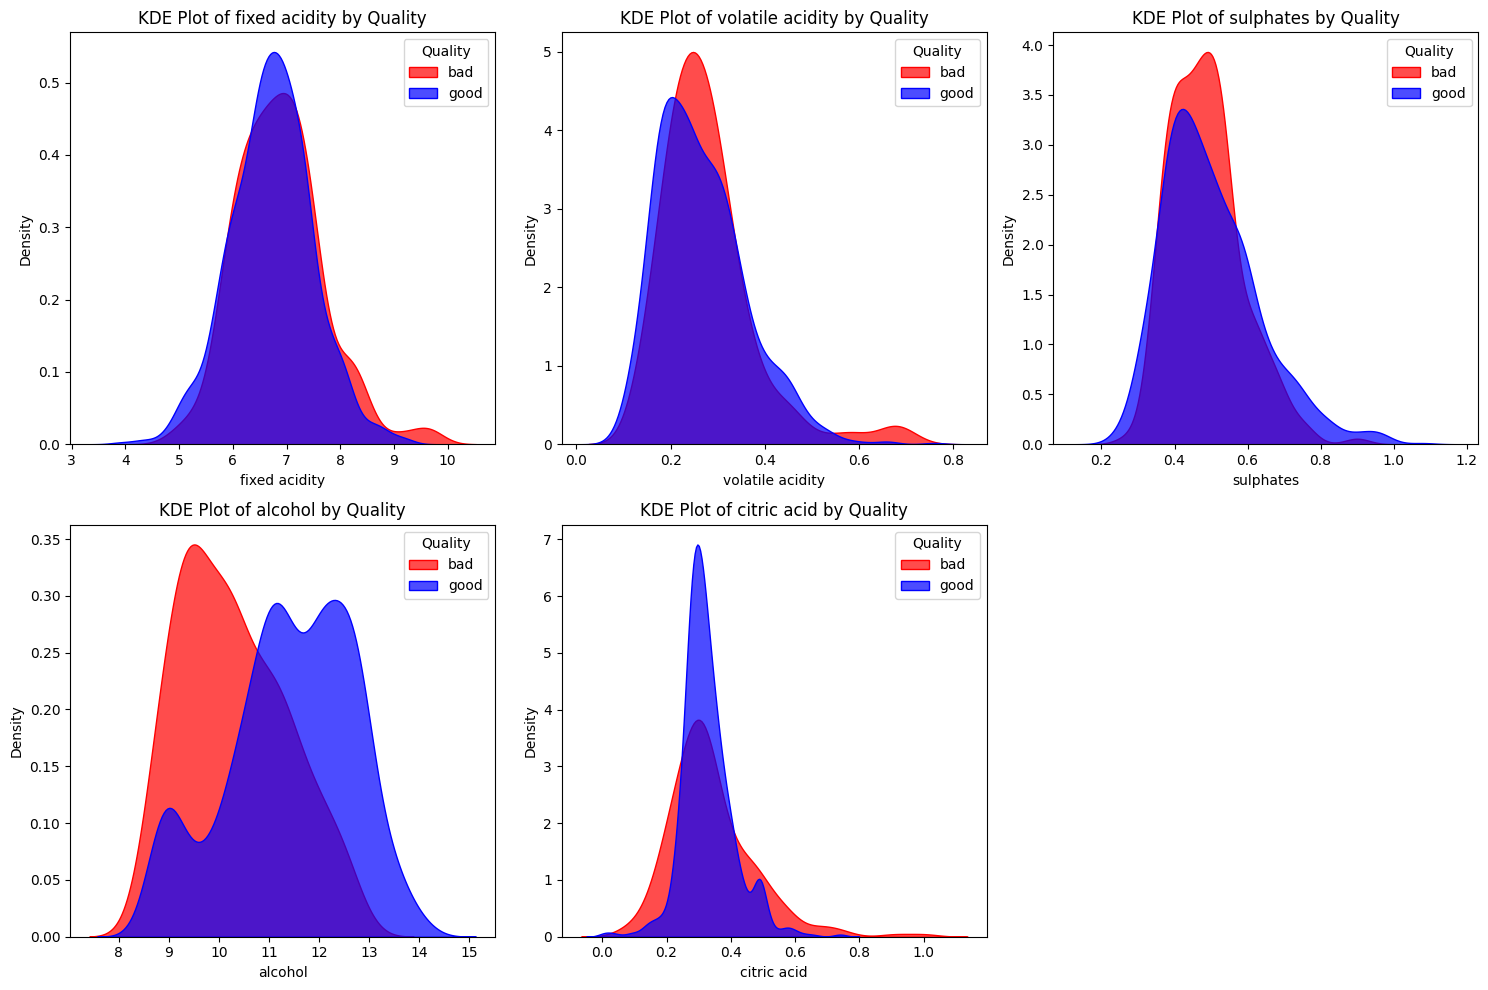

In [57]:
# Selecting the specified features for KDE plots
selected_features = ['fixed acidity', 'volatile acidity', 'sulphates', 'alcohol', 'citric acid']

# Plotting KDE for each feature, separated by quality category
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, idx)
    for quality, color in palette_colors.items():
        sns.kdeplot(data=new_df[new_df['quality'] == quality], x=feature, fill=True, common_norm=False,
                    alpha=0.7, label=legend_labels[quality], color=color)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Quality', loc='upper right', labels=['bad', 'good'])
    plt.title(f'KDE Plot of {feature} by Quality')

plt.tight_layout()
plt.show()

<h2>Violin Plots</h2>

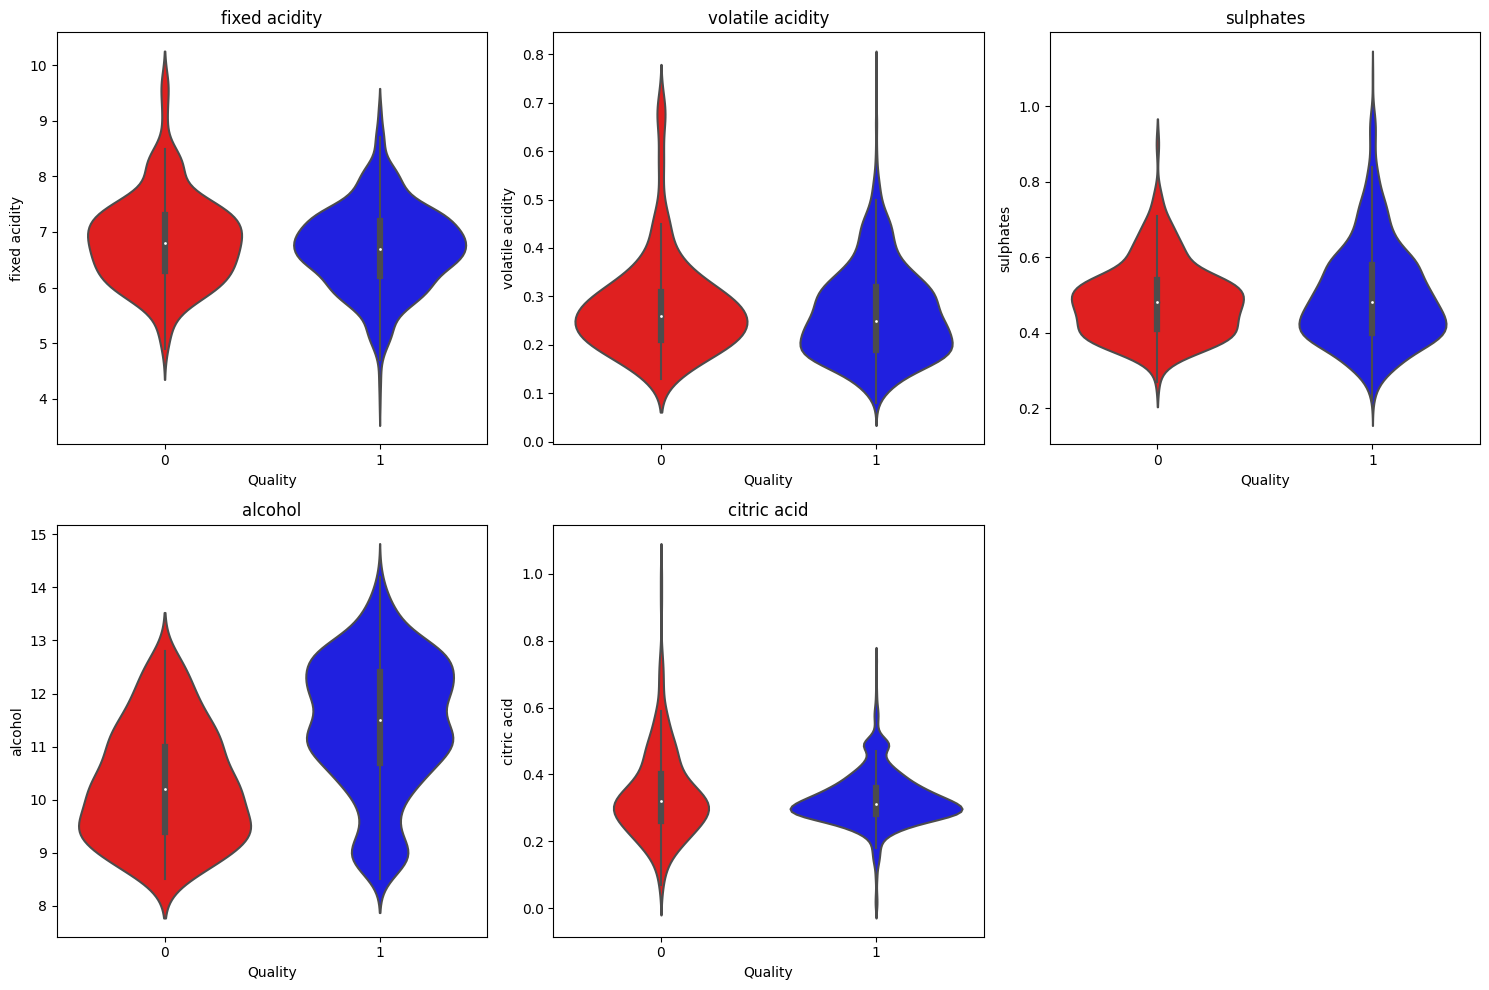

In [59]:
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, idx)
    sns.violinplot(data=new_df, x='quality', y=feature, palette=palette_colors)
    plt.xlabel('Quality')
    plt.ylabel(feature)
    plt.title(f'{feature}')

plt.tight_layout()
plt.show()